Install necessary packages


In [1]:
%pip install pandas
%pip install glob2


[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3.2 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Go do some stuff


In [3]:
# Point to data location
path = "./scraper/data/6_23_2025/"
all_files = glob.glob(path + "*.json")

# Read all files into single dataframe

df_list = []
for file in all_files:
    df = pd.read_json(file)
    df_list.append(df)

combined_df = pd.concat(df_list, ignore_index=True) # ignore_index resets index of combined DF to prevent index duplicates

In [4]:
# Display entire data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display first 10 rows
combined_df.head(5)

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,repairPalData,isNewArrival,isTransferable,features,highlightedFeatures,highlights,lastMadeSaleableDate,transferFee,transferTags,transferText,transferType,minEstimatedTransferDurationInDays,maxEstimatedTransferDurationInDays,transferTimesUnavailable,exteriorColor,interiorColor,normalizedExteriorColor,normalizedInteriorColor,transmission,review,numberOfFavorites,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,originalBatteryRangeInMiles,cylinders,driveTrain,engineType,fuelType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,recommendationType,bestFinanceDecision,store,featureScore,vehicleSize,packages,types,series,isSavedCar,heroImageUrl,heroThumbnailImageUrl,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,NaN,False,56782,7298,Roswell,Roswell,Georgia,GA,2108.0,4.200000,5,NaN,False,True,"[Rear Defroster, Overhead Airbags, Auxiliary A...","Rear View Camera,Auxiliary Audio Input,Alloy W...","[singleOwner, warranty, fuelEfficient, advance...",2025-06-12T20:56:13.565Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Gray,Gray,NaN,NaN,Automatic,NaN,0,True,False,False,28.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,191.0,6100.0,2.5L,181.0,4000.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/27461478/hero.j...,NaN,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,NaN,False,33730,7298,Roswell,Roswell,Georgia,GA,2108.0,4.500000,22,NaN,False,True,"[Power Windows, Power Locks, Air Conditioning,...","Rear View Camera,Auxiliary Audio Input,Overhea...","[warranty, fuelEfficient, advancedFeatures]",2025-06-12T20:53:33.311Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Blue,Black,NaN,NaN,Automatic,NaN,0,True,False,False,30.0,38.0,NaN,4,Front Wheel Drive,Gas,NaN,139.0,6100.0,1.8L,126.0,3900.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,NaN,[],NaN,None,False,https://img2.carmax.com/assets/26070459/hero.j...,NaN,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,NaN,False,58240,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,1,NaN,False,True,"[Power Locks, Auxiliary Audio Input, AM/FM Ste...","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound S...","[singleOwner, advancedFeatures, premiumAudio]",2025-06-20T21:39:32.178Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,23.0,27.0,NaN,6,Four Wheel Drive,Diesel,NaN,305.0,3750.0,3.0L,495.0,2750.0,[],True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,NaN,"[Convenience Package, Z71 Package]",NaN,None,False,https://img2.carmax.com/assets/27175122/hero.j...,NaN,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,NaN,False,15895,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,2,NaN,False,True,"[Alloy Wheels, 20 Inch Plus Wheels, Power Lock...","Technology Package,Leatherette Seats,Satellite...","[singleOwner, lowMiles, warranty, advancedFeat...",2025-05-28T20:50:22.353Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,NaN,NaN,Automatic,NaN,0,True,False,False,18.0,24.0,NaN,6,Front Wheel Drive,Gas,NaN,276.0,6200.0,3.6L,266.0,3600.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,NaN,NaN,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,NaN,[Technology Package],NaN,None,False,https://img2.carmax.com/assets/27072297/hero.j...,NaN,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,NaN,False,2690

Need to dive deeper into the possible values for each column

Data Cleaning
    - handle missing values
    - handle outliers
    
Data Transformation 
    - scaling
    - normalization
    - encoding 
    
Data Splitting
    - create training and testing sets

In [5]:
print("Min ", combined_df['transferFee'].min())
print("Median ",combined_df['transferFee'].median())
print("Mode ",combined_df['transferFee'].mode())

Min  0.0
Median  1999.0
Mode  0    1999.0
Name: transferFee, dtype: float64


In [6]:
# Check data type of features
combined_df.dtypes

stockNumber                int64
vin                       object
year                       int64
make                      object
model                     object
                          ...   
series                    object
isSavedCar                  bool
heroImageUrl              object
heroThumbnailImageUrl    float64
isEVTaxCreditEligible       bool
Length: 69, dtype: object

In [7]:
# Key statistics of studied variables
combined_df.describe()

,stockNumber,year,basePrice,originalPrice,mileage,storeId,distance,averageRating,numberOfReviews,repairPalData,transferFee,minEstimatedTransferDurationInDays,maxEstimatedTransferDurationInDays,normalizedExteriorColor,normalizedInteriorColor,review,numberOfFavorites,mpgCity,mpgHighway,originalBatteryRangeInMiles,cylinders,fuelType,horsepower,horsepowerRpm,engineTorque,engineTorqueRpm,recommendationType,bestFinanceDecision,featureScore,vehicleSize,types,heroThumbnailImageUrl
count,8.711800e+04,87118.000000,87118.000000,6000.000000,87118.000000,87118.000000,87118.000000,87118.000000,87118.000000,0.0,51299.000000,51299.000000,51299.000000,0.0,0.0,0.0,87118.0,83641.000000,83644.000000,3216.000000,87118.00000,0.0,82690.000000,81976.000000,82512.000000,81199.000000,0.0,0.0,78275.000000,0.0,0.0,0.0
mean,2.717417e+07,2020.133015,27154.264951,31170.838833,47292.752818,6836.857286,1603.210494,4.017579,14.774398,NaN,1554.085031,7.996023,18.868867,NaN,NaN,NaN,0.0,23.493932,30.077352,186.421331,4.59269,NaN,232.465691,5871.061957,235.152438,3443.581818,NaN,NaN,6.728815,NaN,NaN,NaN
std,3.649709e+05,2.952196,10909.109501,12141.425771,29595.639905,544.944284,815.575405,1.450467,18.221099,NaN,729.866516,2.753762,5.471971,NaN,NaN,NaN,0.0,5.962185,5.798370,126.225841,1.41678,NaN,76.875368,558.540189,92.402095,1236.750666,NaN,NaN,2.125837,NaN,NaN,NaN
min,1.386364e+07,2001.000000,3065.000000,8998.000000,16.000000,6001.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,6.000000,NaN,NaN,NaN,0.0,8.000000,13.000000,9.000000,0.00000,NaN,11.000000,1770.000000,68.000000,1000.000000,NaN,NaN,1.000000,NaN,NaN,NaN
25%,2.704489e+07,2018.000000,19998.000000,21998.000000,24536.500000,6110.000000,926.800000,4.129032,3.000000,NaN,999.000000,7.000000,17.000000,NaN,NaN,NaN,0.0,19.000000,26.000000,32.000000,4.00000,NaN,178.000000,5600.000000,176.000000,2000.000000,NaN,NaN,5.000000,NaN,NaN,NaN
50%,2.726413e+07,2021.000000,24998.000000,28998.000000,42224.500000,7128.000000,1825.500000,4.500000,9.000000,NaN,1999.000000,9.000000,21.000000,NaN,NaN,NaN,0.0,23.000000,30.000000,247.000000,4.00000,NaN,206.000000,6000.000000,221.000000,4000.000000,NaN,NaN,7.000000,NaN,NaN,NaN
75%,2.742127e+07,2022.000000,31998.000000,37998.000000,64124.750000,7209.000000,2342.800000,4.764706,20.000000,NaN,1999.000000,10.000000,22.000000,NaN,NaN,NaN,0.0,27.000000,34.000000,303.000000,6.00000,NaN,284.000000,6250.000000,270.000000,4400.000000,NaN,NaN,8.000000,NaN,NaN,NaN
max,2.765300e+07,2025.000000,99998.000000,94998.000000,756951.000000,7810.000000,2702.300000,5.000000,202.000000,NaN,1999.000000,12.000000,26.000000,NaN,NaN,NaN,0.0,129.000000,106.000000,412.000000,12.00000,NaN,760.000000,8300.000000,1200.000000,6600.000000,NaN,NaN,10.000000,NaN,NaN,NaN


Based on the descriptive statistics listed above, cross-referenced with the dataframe head before it, it is safe to exclude the following data from the analysis due to an overwhelming presence of NaN values:

- repairPalData
- normalizedExteriorColor
- normalizedInteriorColor
- review
- fuelType
- recommendationType
- bestFinanceDecision
- vehicleSize
- types
- heroThumbnailImageUrl


The following feature can be removed as well as it provides no useful information to the task at hand:

- numberOfFavorites
- heroImageUrl

In [8]:
# Create a new dataframe that is a copy of the original dataframe
df_copy = combined_df.copy()

# Remove irrelevant columns listed above
columns_to_drop = [
    'repairPalData', 'normalizedExteriorColor', 
    'normalizedInteriorColor', 'review',
    'fuelType', 'recommendationType', 
    'bestFinanceDecision', 'vehicleSize', 
    'types', 'heroThumbnailImageUrl',
    'numberOfFavorites', 'heroImageUrl'
]

df_copy = df_copy.drop(columns = columns_to_drop, axis = 1)
df_copy.head()

,stockNumber,vin,year,make,model,body,trim,basePrice,originalPrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,isNewArrival,isTransferable,features,highlightedFeatures,highlights,lastMadeSaleableDate,transferFee,transferTags,transferText,transferType,minEstimatedTransferDurationInDays,maxEstimatedTransferDurationInDays,transferTimesUnavailable,exteriorColor,interiorColor,transmission,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,originalBatteryRangeInMiles,cylinders,driveTrain,engineType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,store,featureScore,packages,series,isSavedCar,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,NaN,False,56782,7298,Roswell,Roswell,Georgia,GA,2108.0,4.200000,5,False,True,"[Rear Defroster, Overhead Airbags, Auxiliary A...","Rear View Camera,Auxiliary Audio Input,Alloy W...","[singleOwner, warranty, fuelEfficient, advance...",2025-06-12T20:56:13.565Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Gray,Gray,Automatic,True,False,False,28.0,38.0,NaN,4,Front Wheel Drive,Gas,191.0,6100.0,2.5L,181.0,4000.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,[],None,False,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,NaN,False,33730,7298,Roswell,Roswell,Georgia,GA,2108.0,4.500000,22,False,True,"[Power Windows, Power Locks, Air Conditioning,...","Rear View Camera,Auxiliary Audio Input,Overhea...","[warranty, fuelEfficient, advancedFeatures]",2025-06-12T20:53:33.311Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Blue,Black,Automatic,True,False,False,30.0,38.0,NaN,4,Front Wheel Drive,Gas,139.0,6100.0,1.8L,126.0,3900.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,[],None,False,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,NaN,False,58240,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,1,False,True,"[Power Locks, Auxiliary Audio Input, AM/FM Ste...","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound S...","[singleOwner, advancedFeatures, premiumAudio]",2025-06-20T21:39:32.178Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,Automatic,True,False,False,23.0,27.0,NaN,6,Four Wheel Drive,Diesel,305.0,3750.0,3.0L,495.0,2750.0,[],True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,"[Convenience Package, Z71 Package]",None,False,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,NaN,False,15895,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,2,False,True,"[Alloy Wheels, 20 Inch Plus Wheels, Power Lock...","Technology Package,Leatherette Seats,Satellite...","[singleOwner, lowMiles, warranty, advancedFeat...",2025-05-28T20:50:22.353Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Black,Automatic,True,False,False,18.0,24.0,NaN,6,Front Wheel Drive,Gas,276.0,6200.0,3.6L,266.0,3600.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,[Technology Package],None,False,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,NaN,False,26900,7298,Roswell,Roswell,Georgia,GA,2108.0,4.333333,6,False,True,"[Power Windows, Traction Control, ABS Brakes, ...","Leatherette Seats,Pioneer Sound System,Parking...","[singleOwner, lowMilesPerYear, warranty, advan...",2025-06-13T20:59:37.45Z,1999.0,"[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,9.0,22.0,False,Black,Red,Automatic,True,False,False,22.0,31.0,NaN,6,Front Wheel Drive,Gas,302.0,6600.0,3.5L,267.0,4700.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,[],ES,False,False


In [9]:
# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [10]:
# Apply missing values table method on df_copy
missing_vals = missing_values_table(df_copy)
missing_vals


Your selected dataframe has 57 columns.
There are 24 columns that have missing values.


,Missing Values,% of Total Values
originalBatteryRangeInMiles,83902,96.3
originalPrice,81118,93.1
series,79758,91.6
transferFee,35819,41.1
minEstimatedTransferDurationInDays,35819,41.1
maxEstimatedTransferDurationInDays,35819,41.1
featureScore,8843,10.2
trim,7444,8.5
lastMadeSaleableDate,6783,7.8
engineTorqueRpm,5919,6.8


Based on the null value counts listed above, the following features can be removed from analysis due to a mjority of the data missing:

- originalPrice (roughly 90% of the data is missing)
- series (almost 90% of the data is missing)
- originalBatteryRangeInMiles (over 90% of the data is missing, probably because most of the vehicles are not electric/hybrid cars)

The following columns can also be removed due to a combinationg of having a relatively high amount of missing values and the fact that transfer fees are generally associated with vehicle transportation between different CarMax storefronts rather than the market price associated with the vehicle itself:

- minEstimatedTransferDurationInDays (about 40% of the data is missing)
- maxEstimatedTransferDurationInDays (about 40% of the data is missing)
- transferFee (about 40% of the data is missing)

Drop lastMadeSaleableDate column since it is irrelevant to the price of a car


In [12]:
# Remove irrelevant columns listed above
columns_to_drop_2 = [
    'originalPrice', 'originalBatteryRangeInMiles', 
    'series', 'minEstimatedTransferDurationInDays',
    'maxEstimatedTransferDurationInDays', 'transferFee',
    'lastMadeSaleableDate'
]

df_copy = df_copy.drop(columns = columns_to_drop_2, axis = 1)
df_copy.head()

,stockNumber,vin,year,make,model,body,trim,basePrice,hasPriceDrop,mileage,storeId,storeName,storeCity,state,stateAbbreviation,distance,averageRating,numberOfReviews,isNewArrival,isTransferable,features,highlightedFeatures,highlights,transferTags,transferText,transferType,transferTimesUnavailable,exteriorColor,interiorColor,transmission,isSaleable,isComingSoon,isReserved,mpgCity,mpgHighway,cylinders,driveTrain,engineType,horsepower,horsepowerRpm,engineSize,engineTorque,engineTorqueRpm,priorUseDescriptions,isAvailableToTransact,store,featureScore,packages,isSavedCar,isEVTaxCreditEligible
0,27461478,5NPEG4JA8NH134099,2022,Hyundai,Sonata,4D Sedan,SE,19998,False,56782,7298,Roswell,Roswell,Georgia,GA,2108.0,4.200000,5,False,True,"[Rear Defroster, Overhead Airbags, Auxiliary A...","Rear View Camera,Auxiliary Audio Input,Alloy W...","[singleOwner, warranty, fuelEfficient, advance...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Gray,Gray,Automatic,True,False,False,28.0,38.0,4,Front Wheel Drive,Gas,191.0,6100.0,2.5L,181.0,4000.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",3.0,[],False,False
1,26070459,JTDEPMAE5NJ210260,2022,Toyota,Corolla,4D Sedan,LE,20998,False,33730,7298,Roswell,Roswell,Georgia,GA,2108.0,4.500000,22,False,True,"[Power Windows, Power Locks, Air Conditioning,...","Rear View Camera,Auxiliary Audio Input,Overhea...","[warranty, fuelEfficient, advancedFeatures]","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Blue,Black,Automatic,True,False,False,30.0,38.0,4,Front Wheel Drive,Gas,139.0,6100.0,1.8L,126.0,3900.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,[],False,False
2,27175122,3GCUDFE80RG128481,2024,Chevrolet,Silverado 1500,4D Crew Cab,LT Trail Boss,51998,False,58240,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,1,False,True,"[Power Locks, Auxiliary Audio Input, AM/FM Ste...","Z71 Package,4WD/AWD,Leather Seats,BOSE Sound S...","[singleOwner, advancedFeatures, premiumAudio]","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Black,Automatic,True,False,False,23.0,27.0,6,Four Wheel Drive,Diesel,305.0,3750.0,3.0L,495.0,2750.0,[],True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",10.0,"[Convenience Package, Z71 Package]",False,False
3,27072297,1V2WE2CA5PC229115,2023,Volkswagen,Atlas Cross Sport,4D Sport Utility,SE w/Tech,32998,False,15895,7298,Roswell,Roswell,Georgia,GA,2108.0,5.000000,2,False,True,"[Alloy Wheels, 20 Inch Plus Wheels, Power Lock...","Technology Package,Leatherette Seats,Satellite...","[singleOwner, lowMiles, warranty, advancedFeat...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Black,Automatic,True,False,False,18.0,24.0,6,Front Wheel Drive,Gas,276.0,6200.0,3.6L,266.0,3600.0,"[{'id': 10, 'name': 'Fleet', 'description': 'T...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",5.0,[Technology Package],False,False
4,27386026,58AGZ1B12MU110647,2021,Lexus,ES 350,4D Sedan,F-Sport,35998,False,26900,7298,Roswell,Roswell,Georgia,GA,2108.0,4.333333,6,False,True,"[Power Windows, Traction Control, ABS Brakes, ...","Leatherette Seats,Pioneer Sound System,Parking...","[singleOwner, lowMilesPerYear, warranty, advan...","[GeneratedByCps, Paid]",$1999 Shipping,shipping-from,False,Black,Red,Automatic,True,False,False,22.0,31.0,6,Front Wheel Drive,Gas,302.0,6600.0,3.5L,267.0,4700.0,"[{'id': 20, 'name': 'Leased Vehicle', 'descrip...",True,"{'id': 7298, 'name': 'Roswell', 'city': None, ...",7.0,[],False,False


In [13]:
print("DataFrame Shape:", df_copy.shape)


DataFrame Shape: (87118, 50)


Still need to figure out how to deal with remaining null values in the following columns:

- body ==========================> 2
- trim ==========================> 7444
- transferText ==================> 1
- transferType ==================> 1
- exteriorColor =================> 55
- interiorColor =================> 83
- transmission ==================> 1
- mpgCity =======================> 3477
- mpgHighway ====================> 3474
- driveTrain ====================> 266
- engineType ====================> 2
- horsepower ====================> 4428
- horsepowerRpm =================> 5142
- engineSize ====================> 11
- engineTorque ==================> 4606
- engineTorqueRpm ===============> 5919
- featureScore ==================> 8843

We may be able to assume that certain features are tied to electric vehicles (such as the mpgCity and mpgHighway)

It might be beneficial to put EVs into a separate dataframe and conduct a separate EDA.

Its possible that the "null" trims are just Base Trims for the models in question: Might be best to interpolate this with the value of "Base"
    - can check if Base Trims exist as its own standalone

The null featureScores might be able to be changed to 0s since the cars may have no available features

In [14]:
# Check rows with duplicate VINS and drop
df_unique = df_copy.drop_duplicates(subset=['vin'], keep='first')
print("Unique DataFrame Shape:", df_unique.shape)

Unique DataFrame Shape: (86161, 50)


957 Duplicate Rows removed

In [15]:
# Test to see if I can get dataframe of nulls

# Create a boolean mask where True indicates a null value in any column of that row
null_mask = df_unique.isnull().any(axis=1)

# Create a new DataFrame containing only the rows with null values
df_null_rows = df_unique[null_mask]

print("\nDataFrame with rows containing null values:")
df_null_rows.head(10)

print("DataFrame Shape:", df_null_rows.shape)



DataFrame with rows containing null values:
DataFrame Shape: (21294, 50)


Make a method to get the distribution of values for each feature containing null values

In [16]:
# Create a dataframe with null value rows removed

# Create copy of df_unique
df_unique_copy = df_unique.copy()

# Remove rows with any null value
df_unique_cleaned = df_unique_copy.dropna()
# print(df_unique_cleaned)

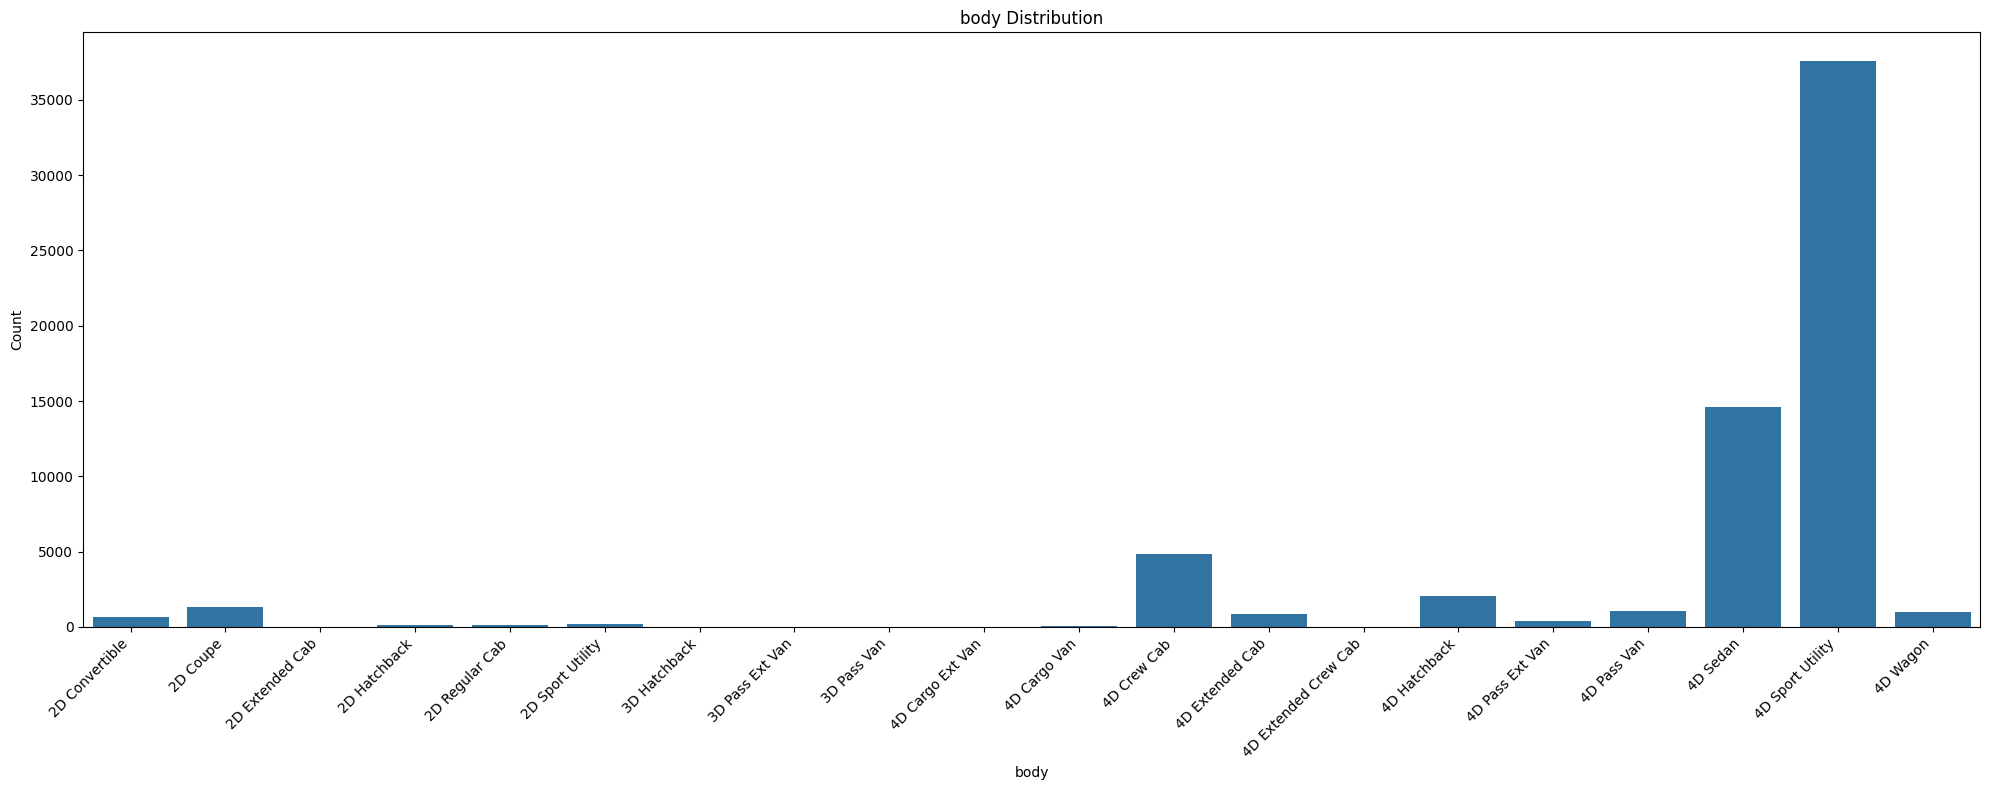

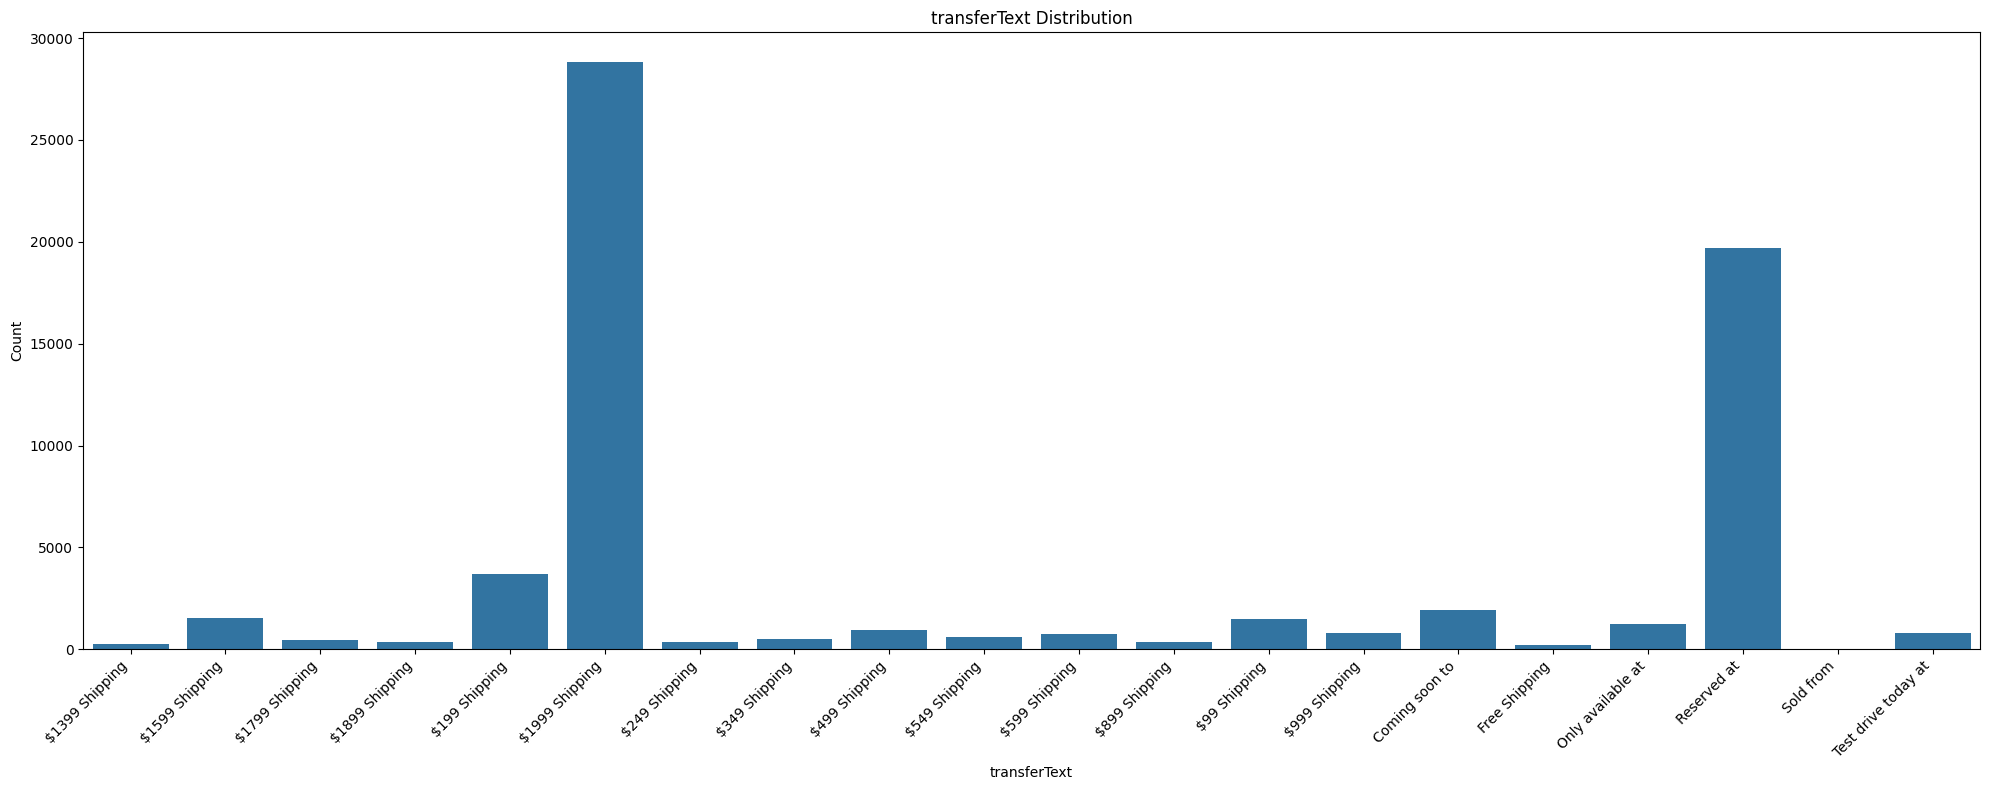

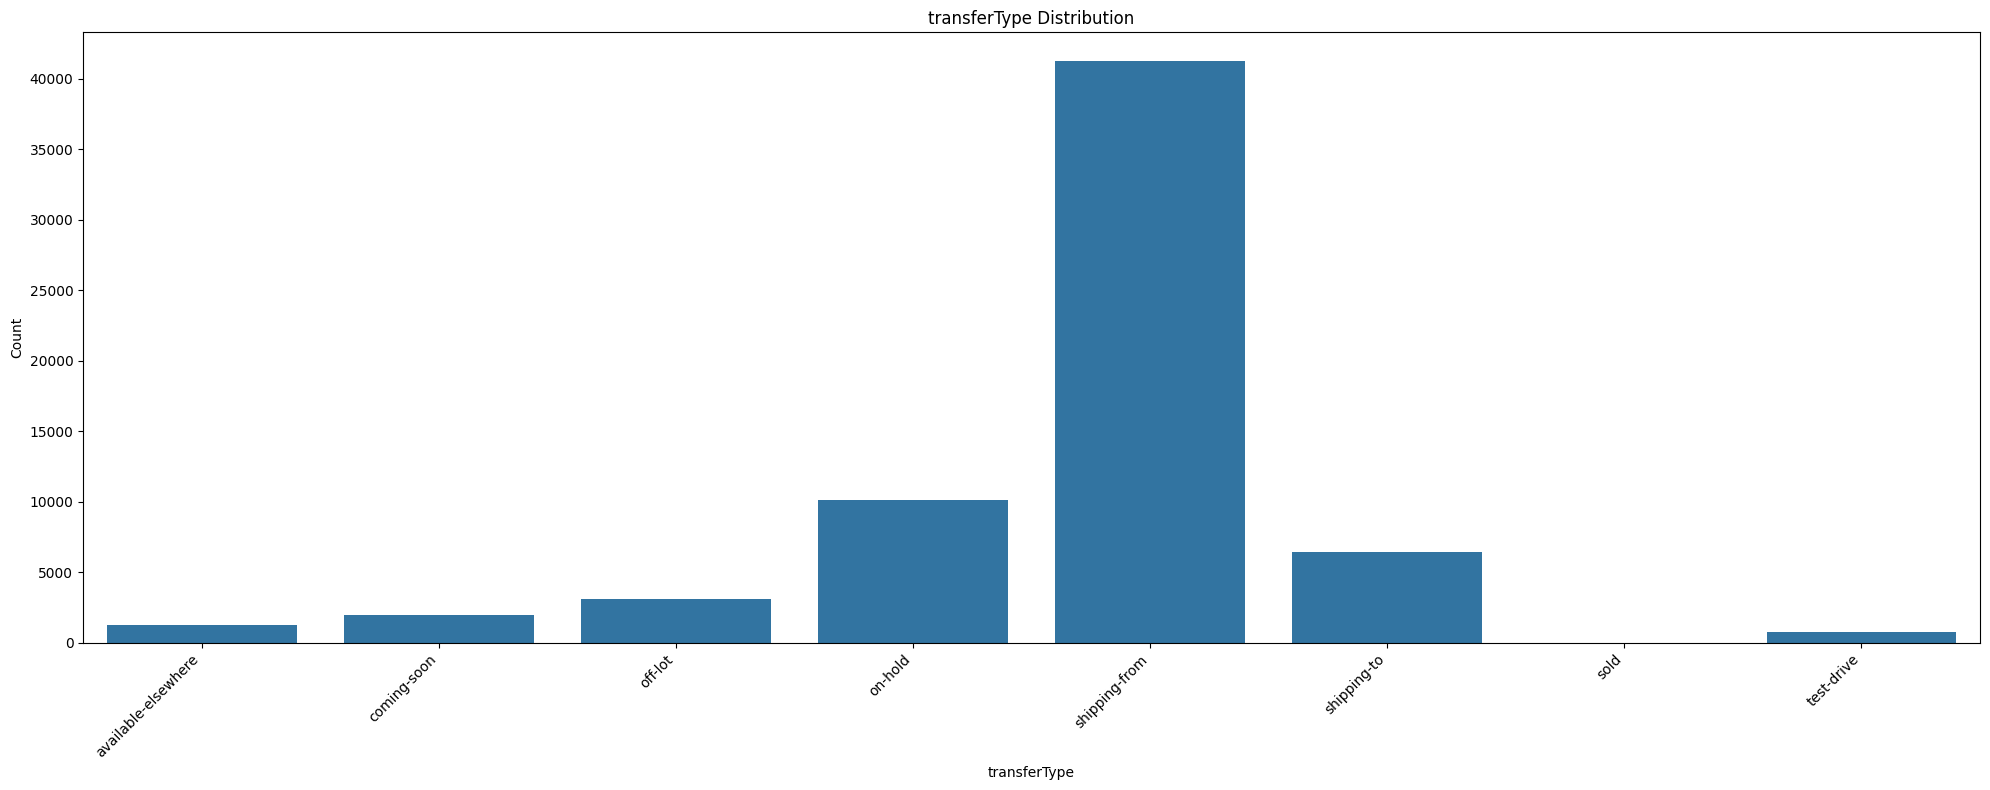

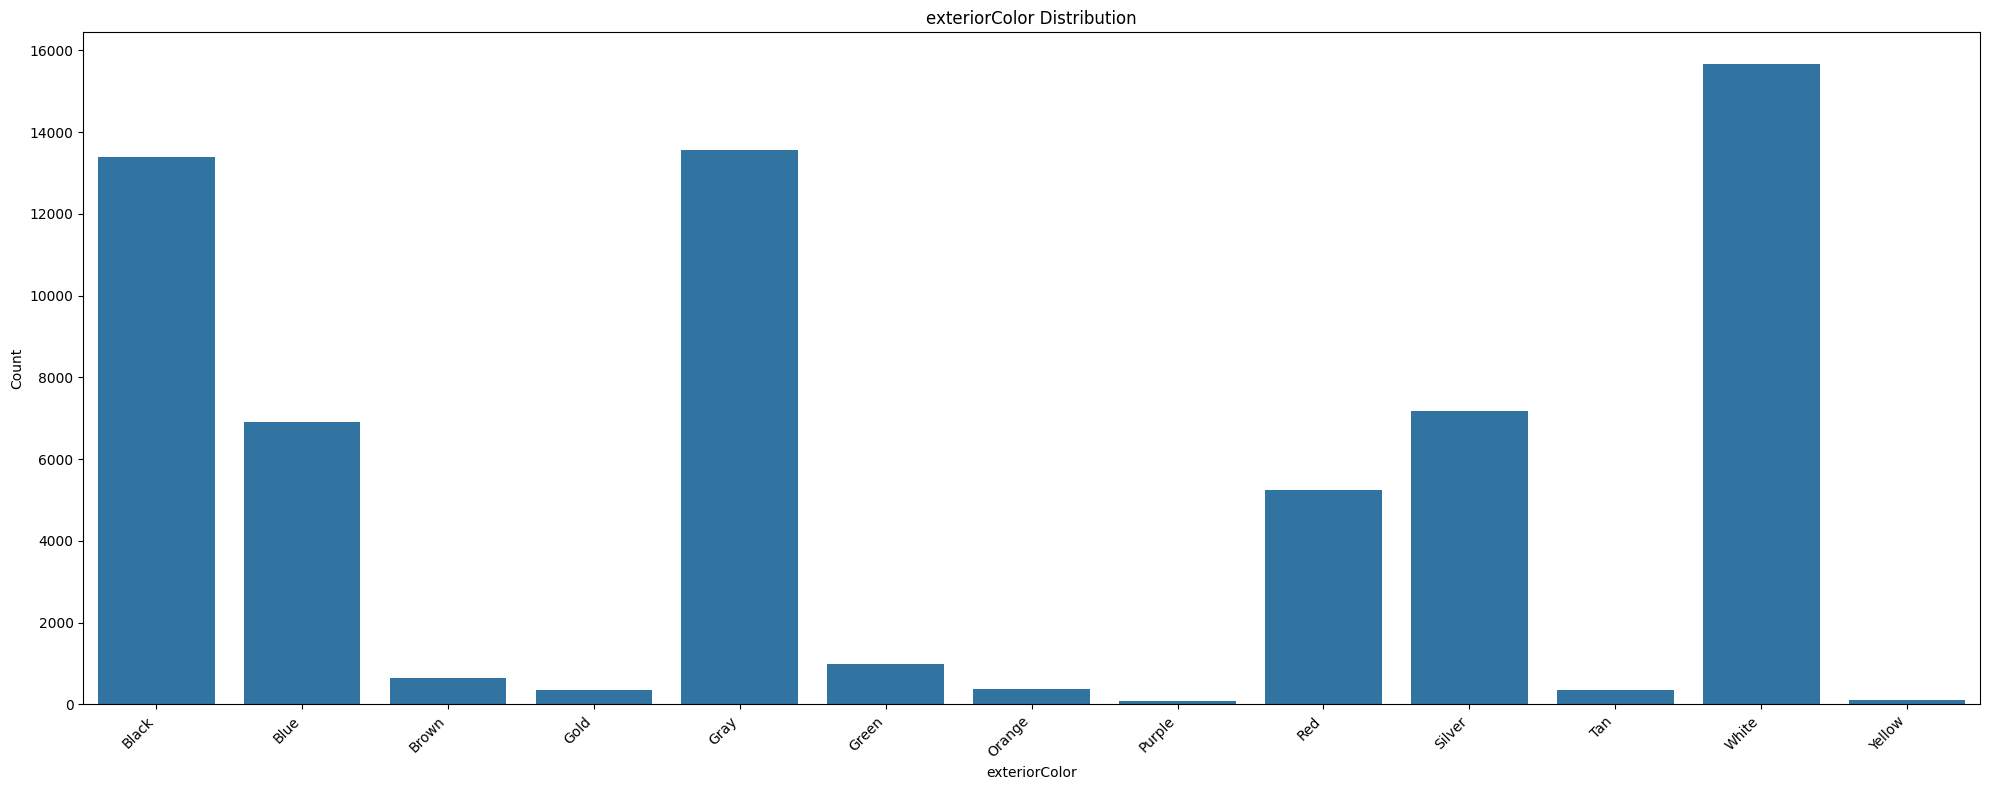

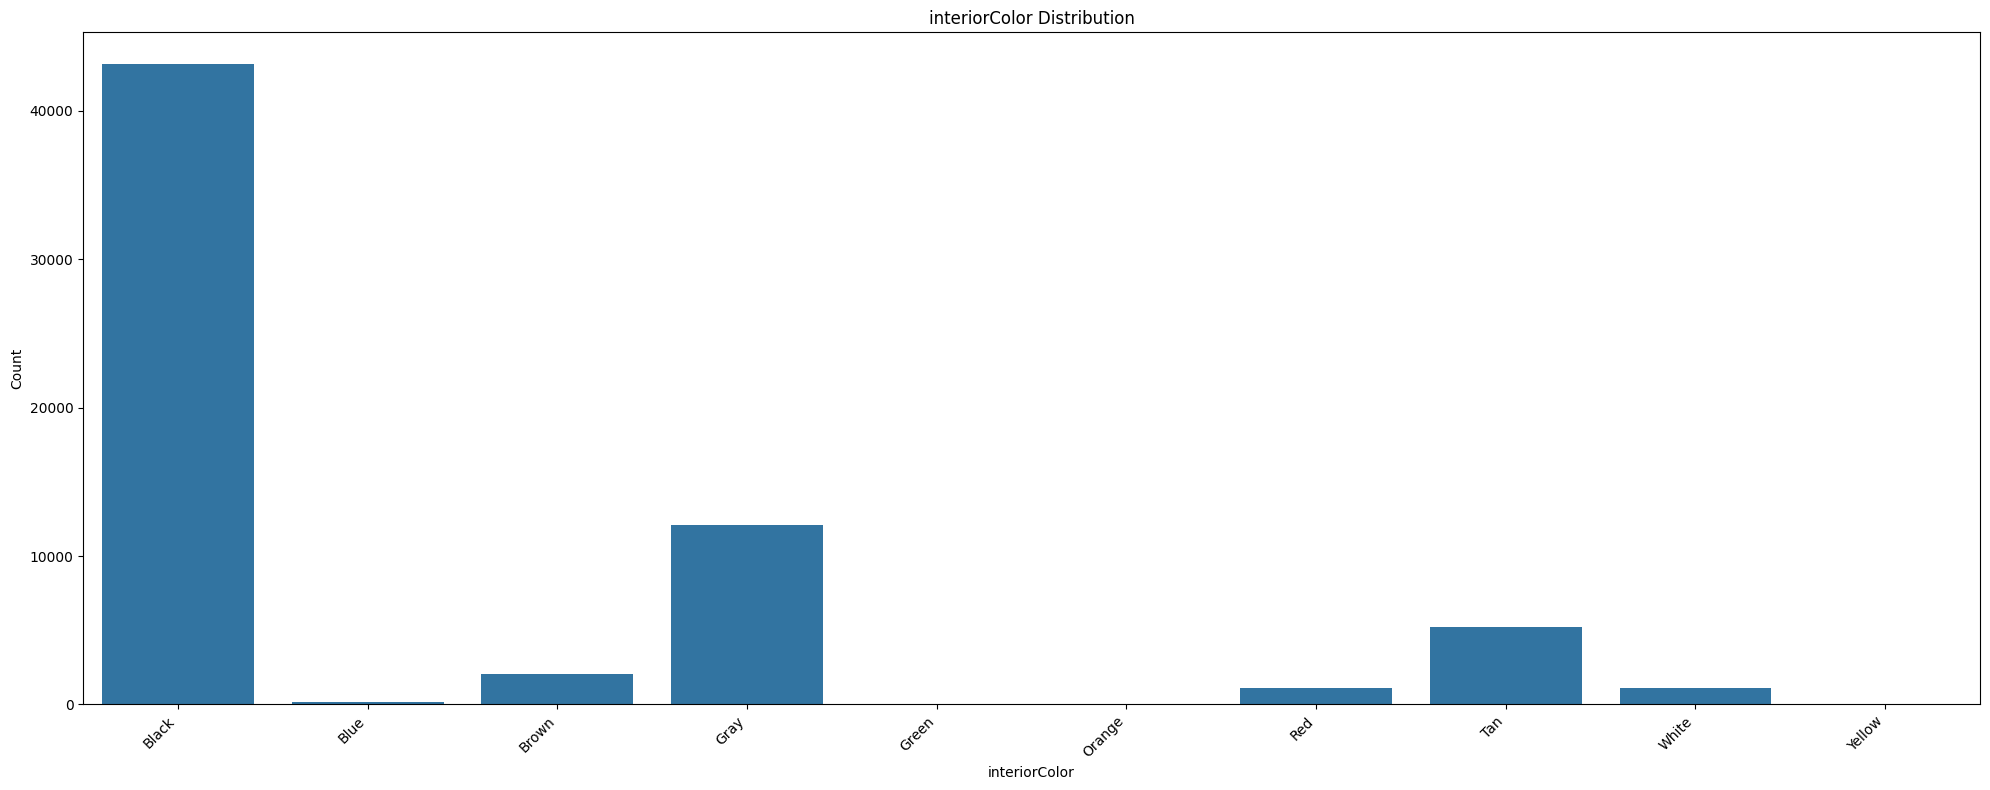

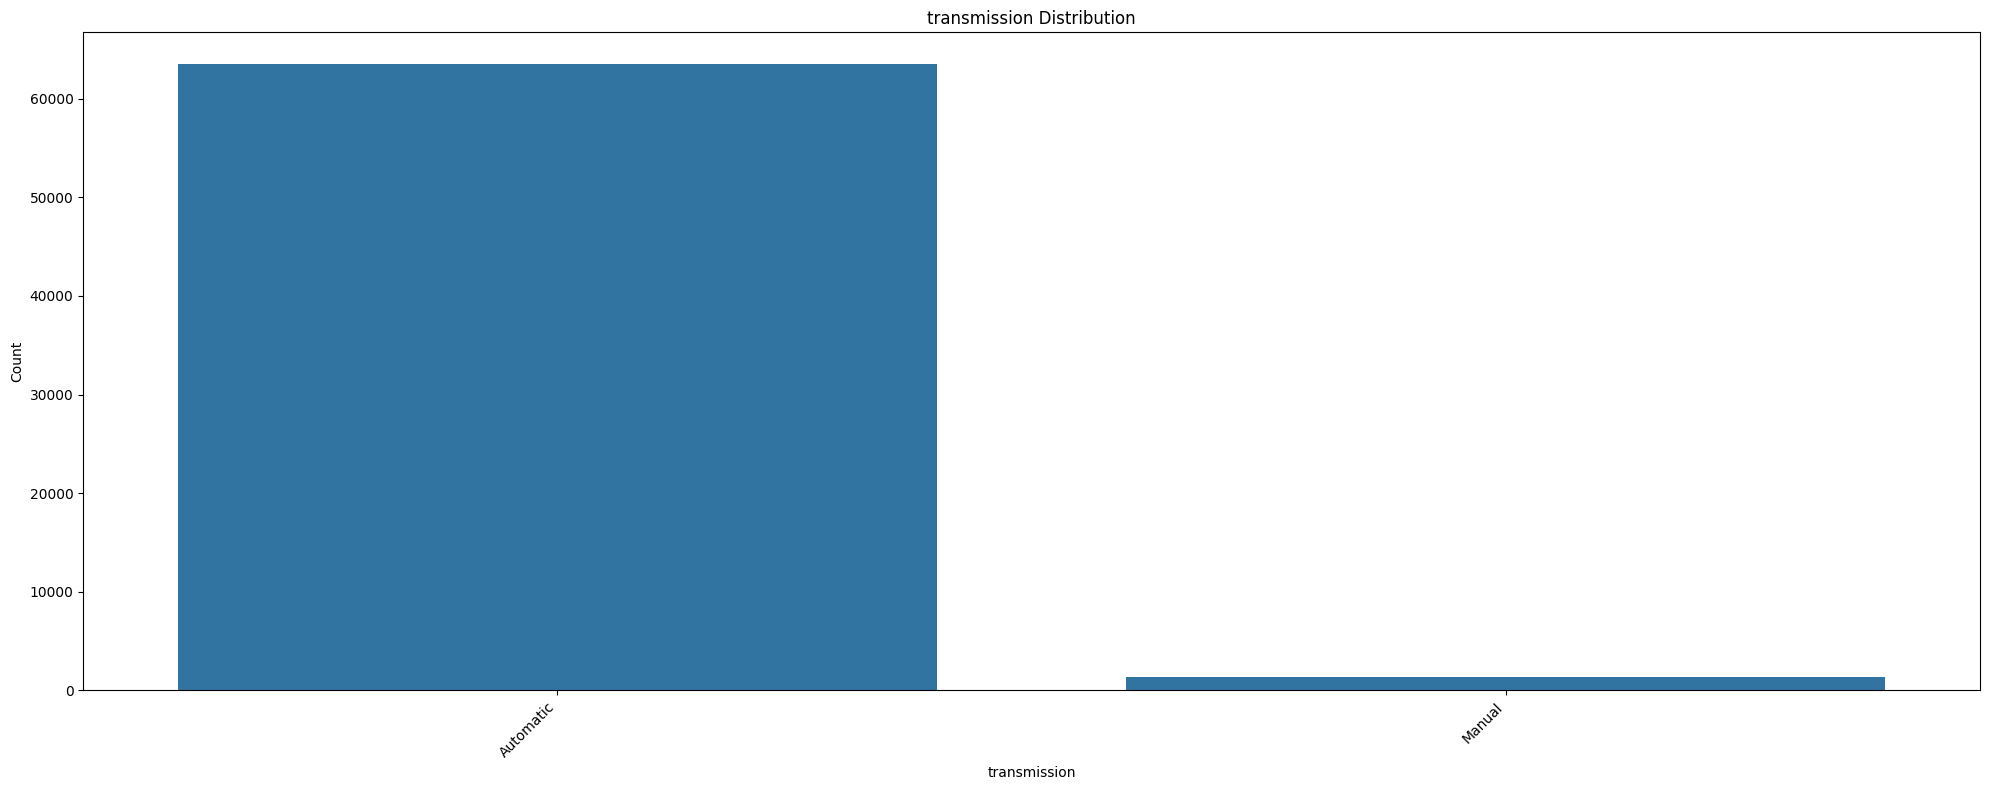

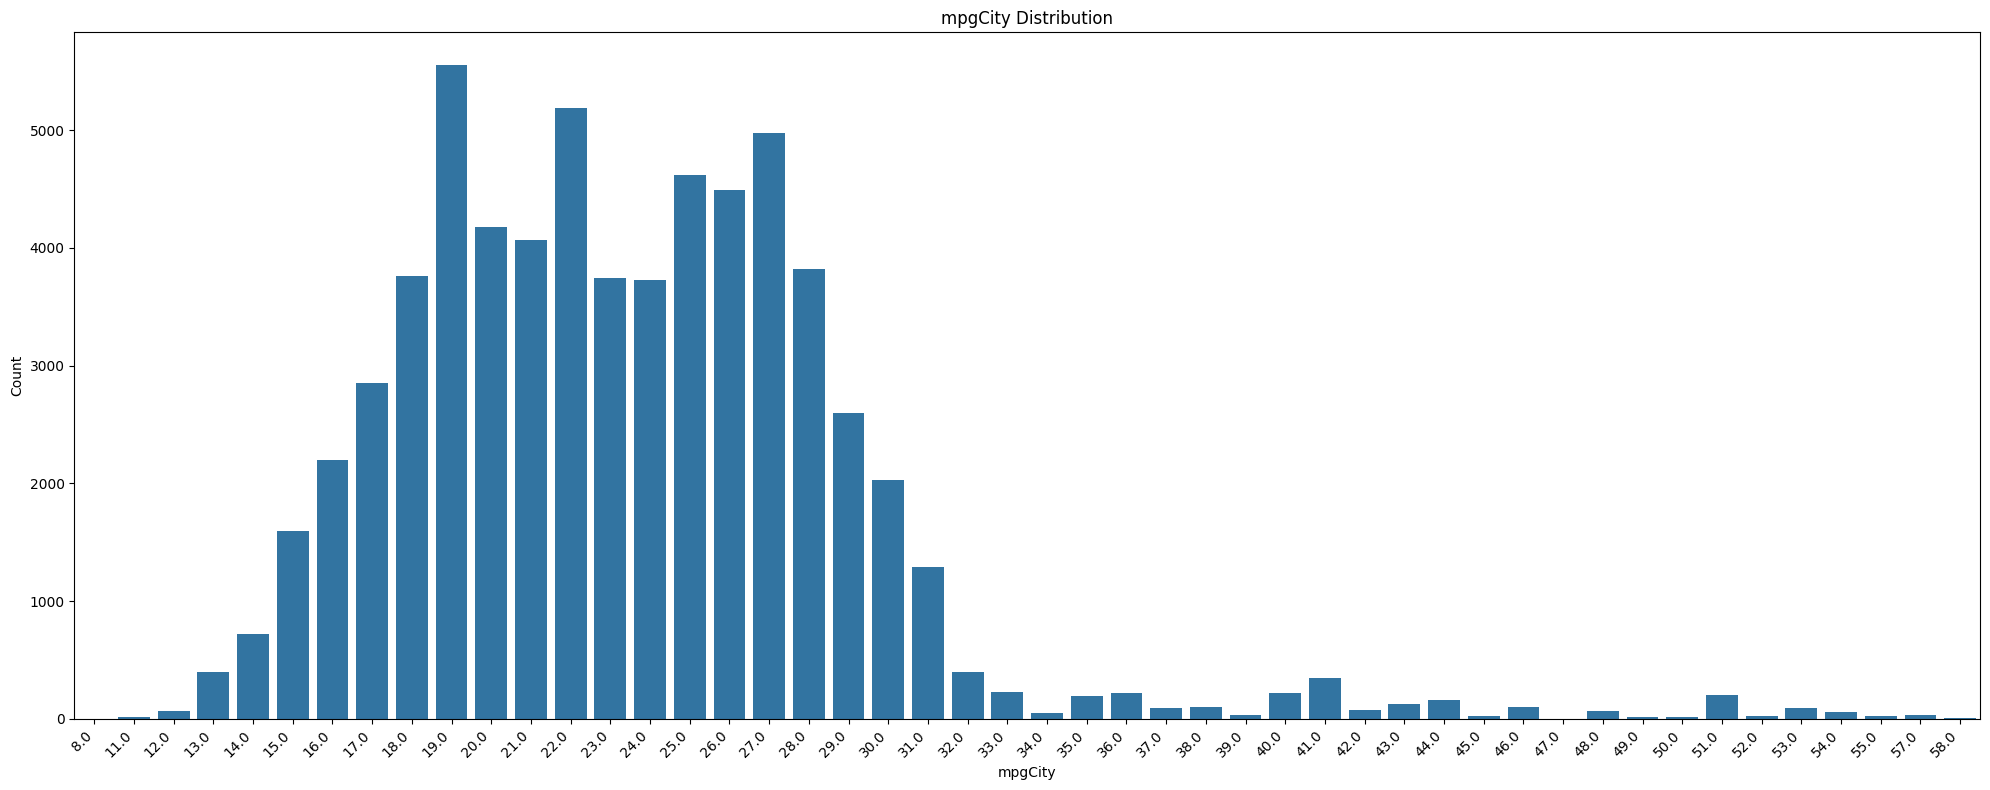

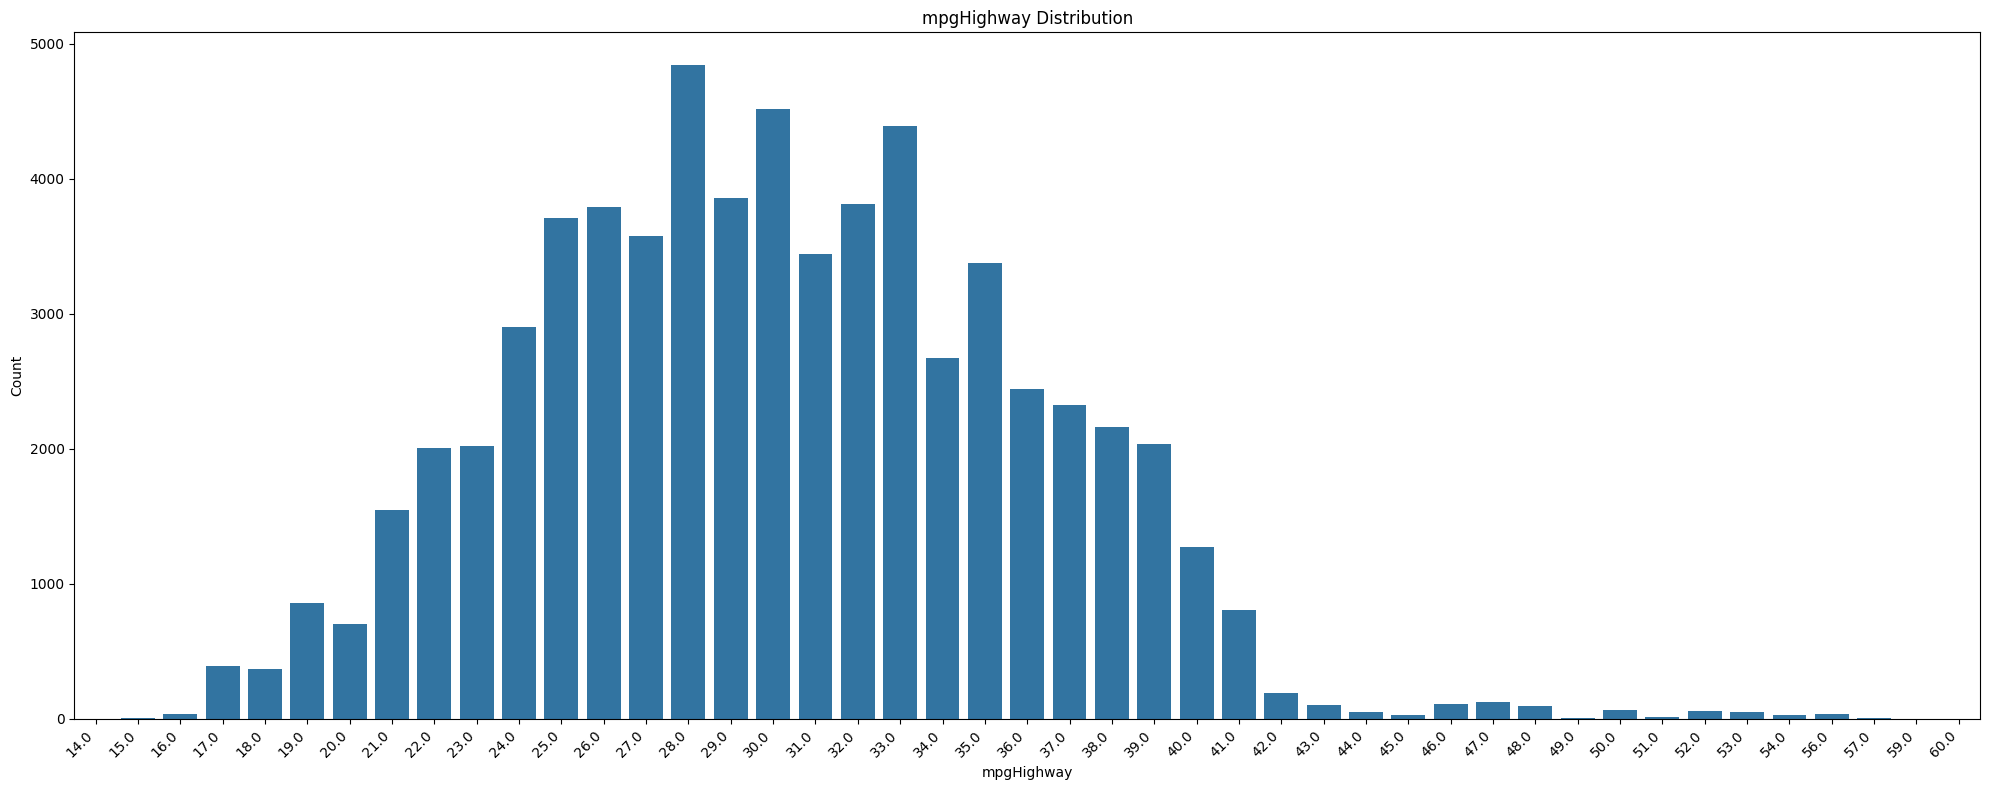

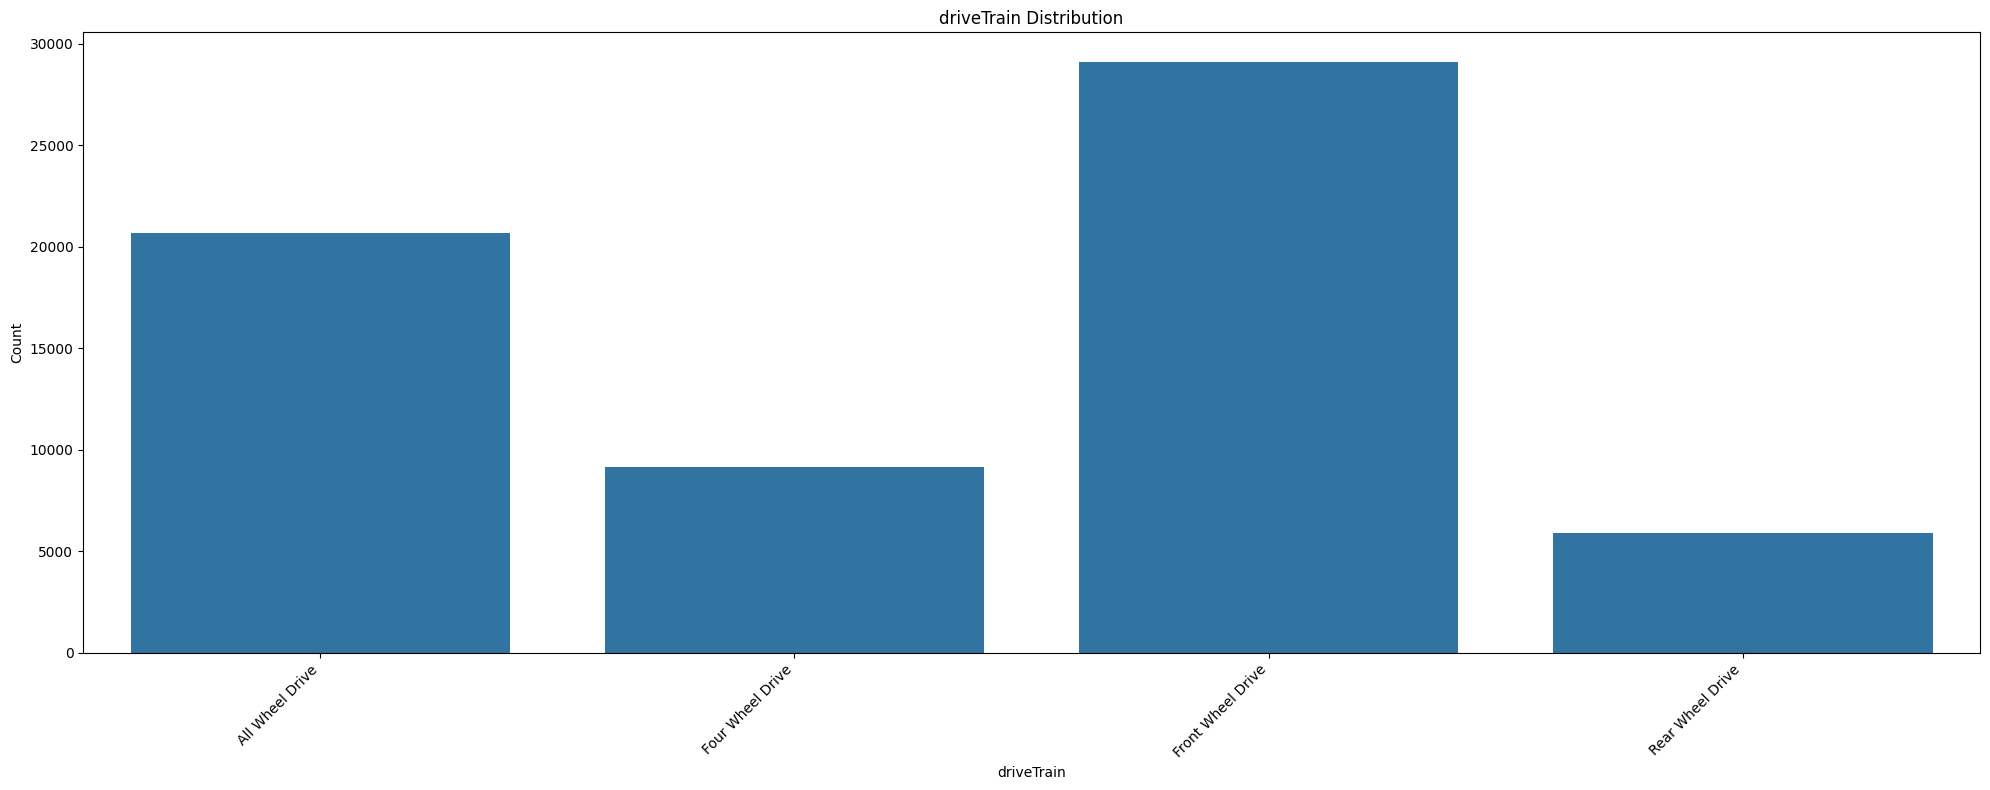

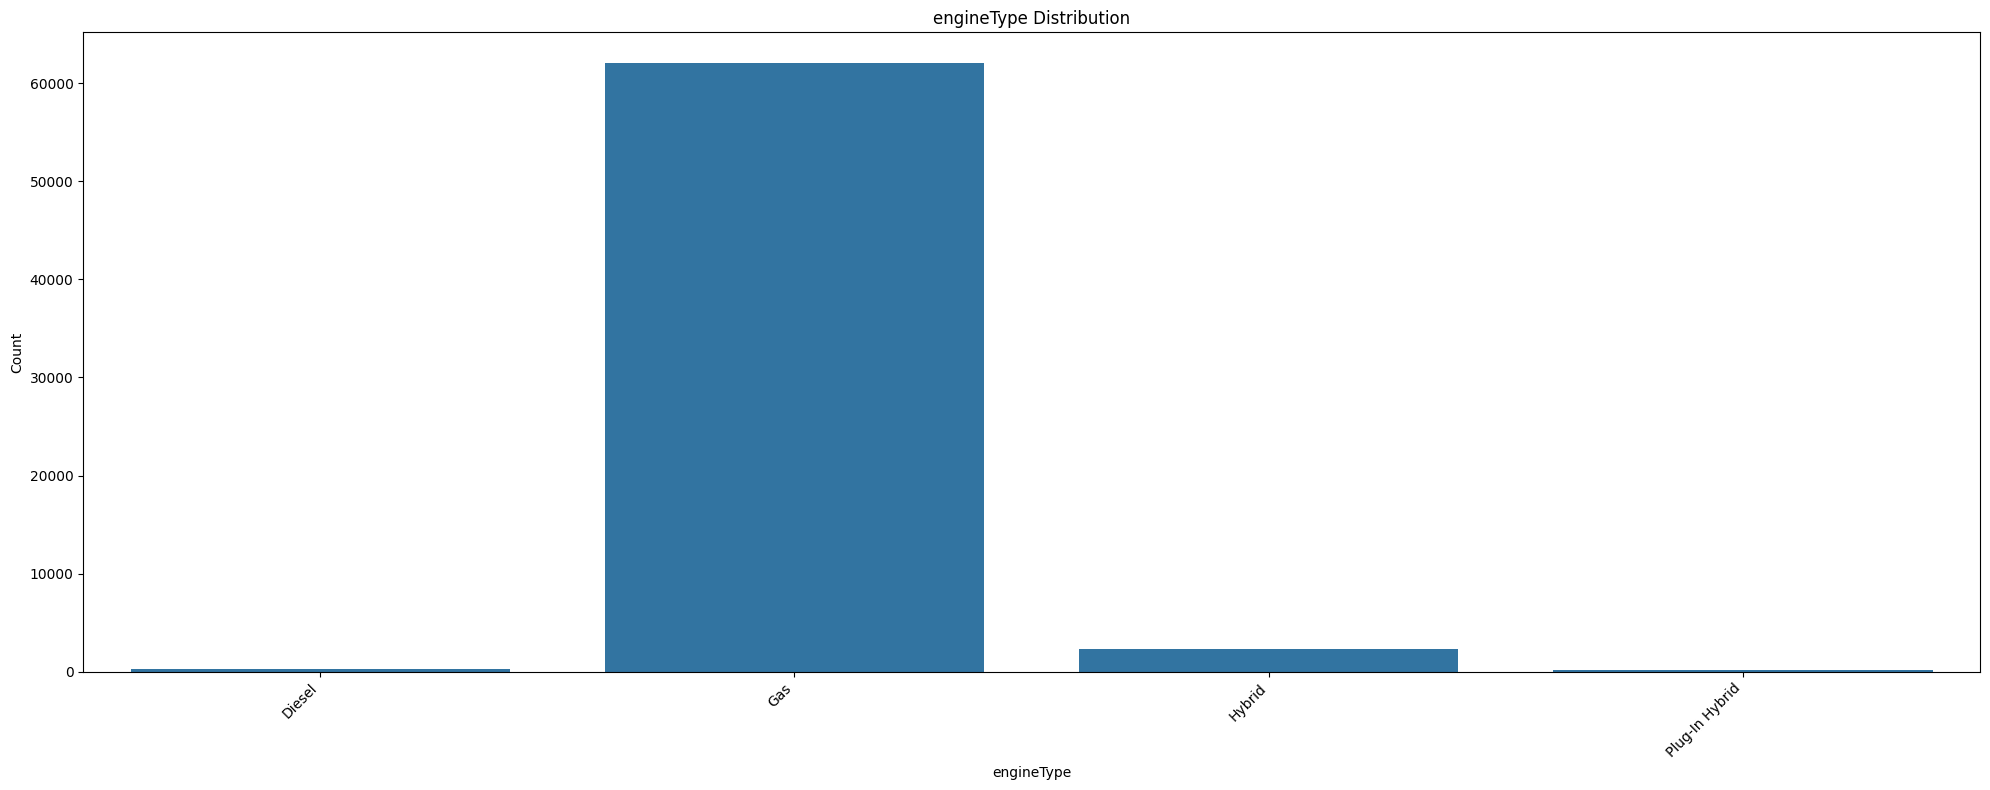

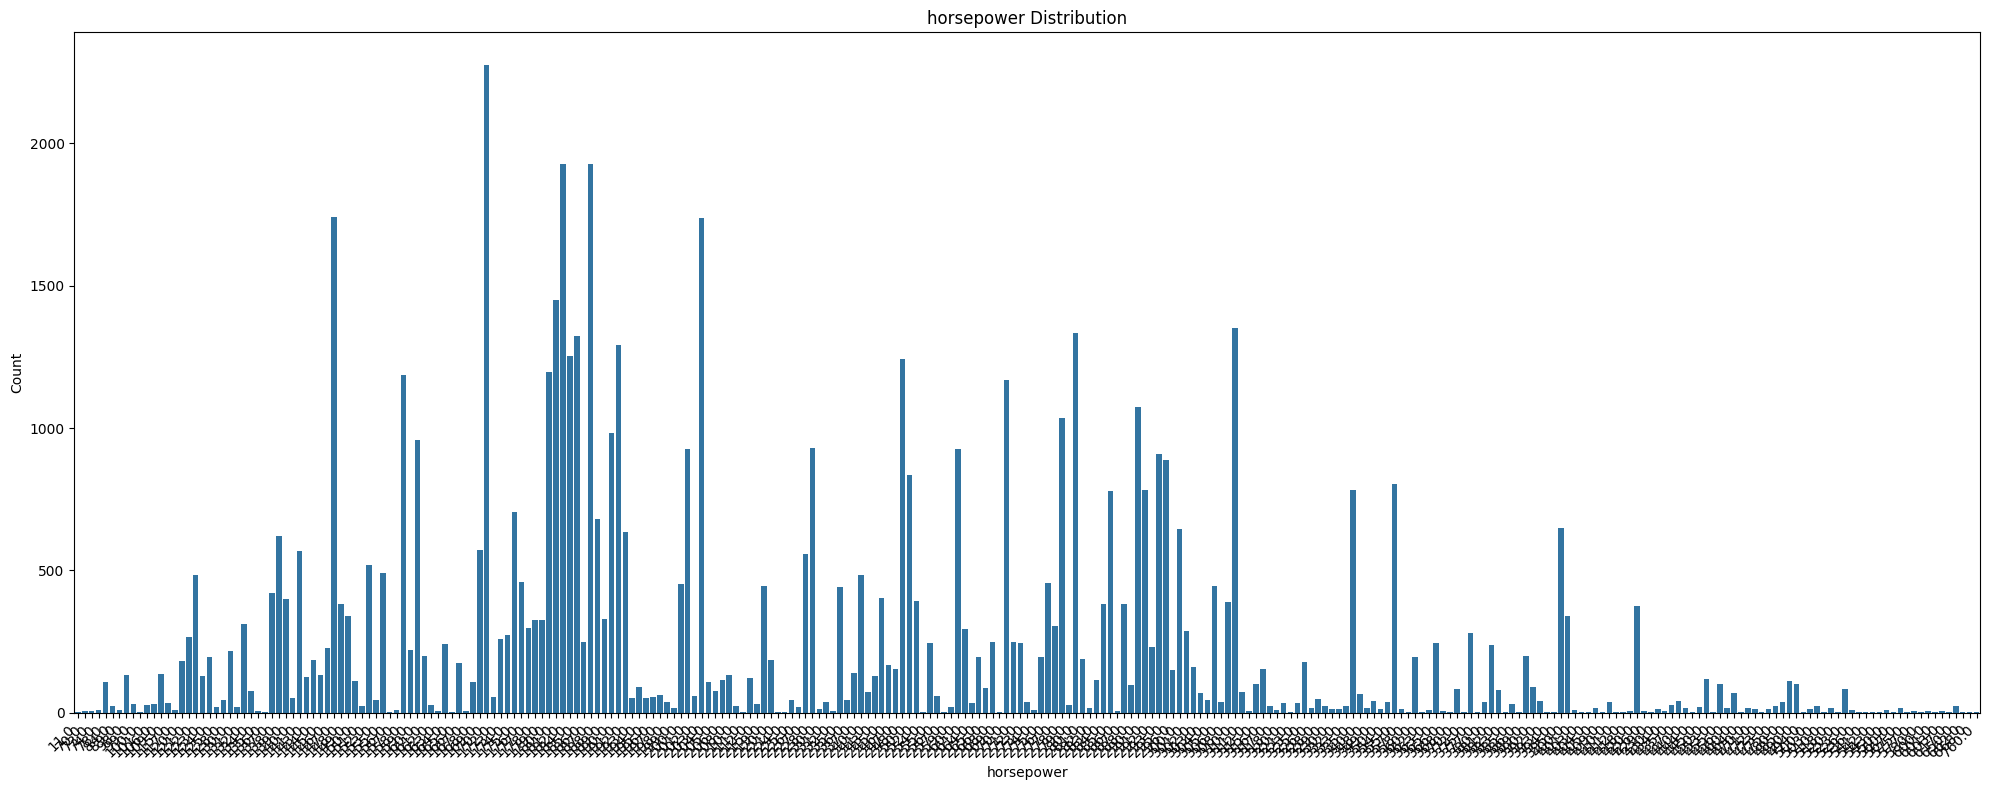

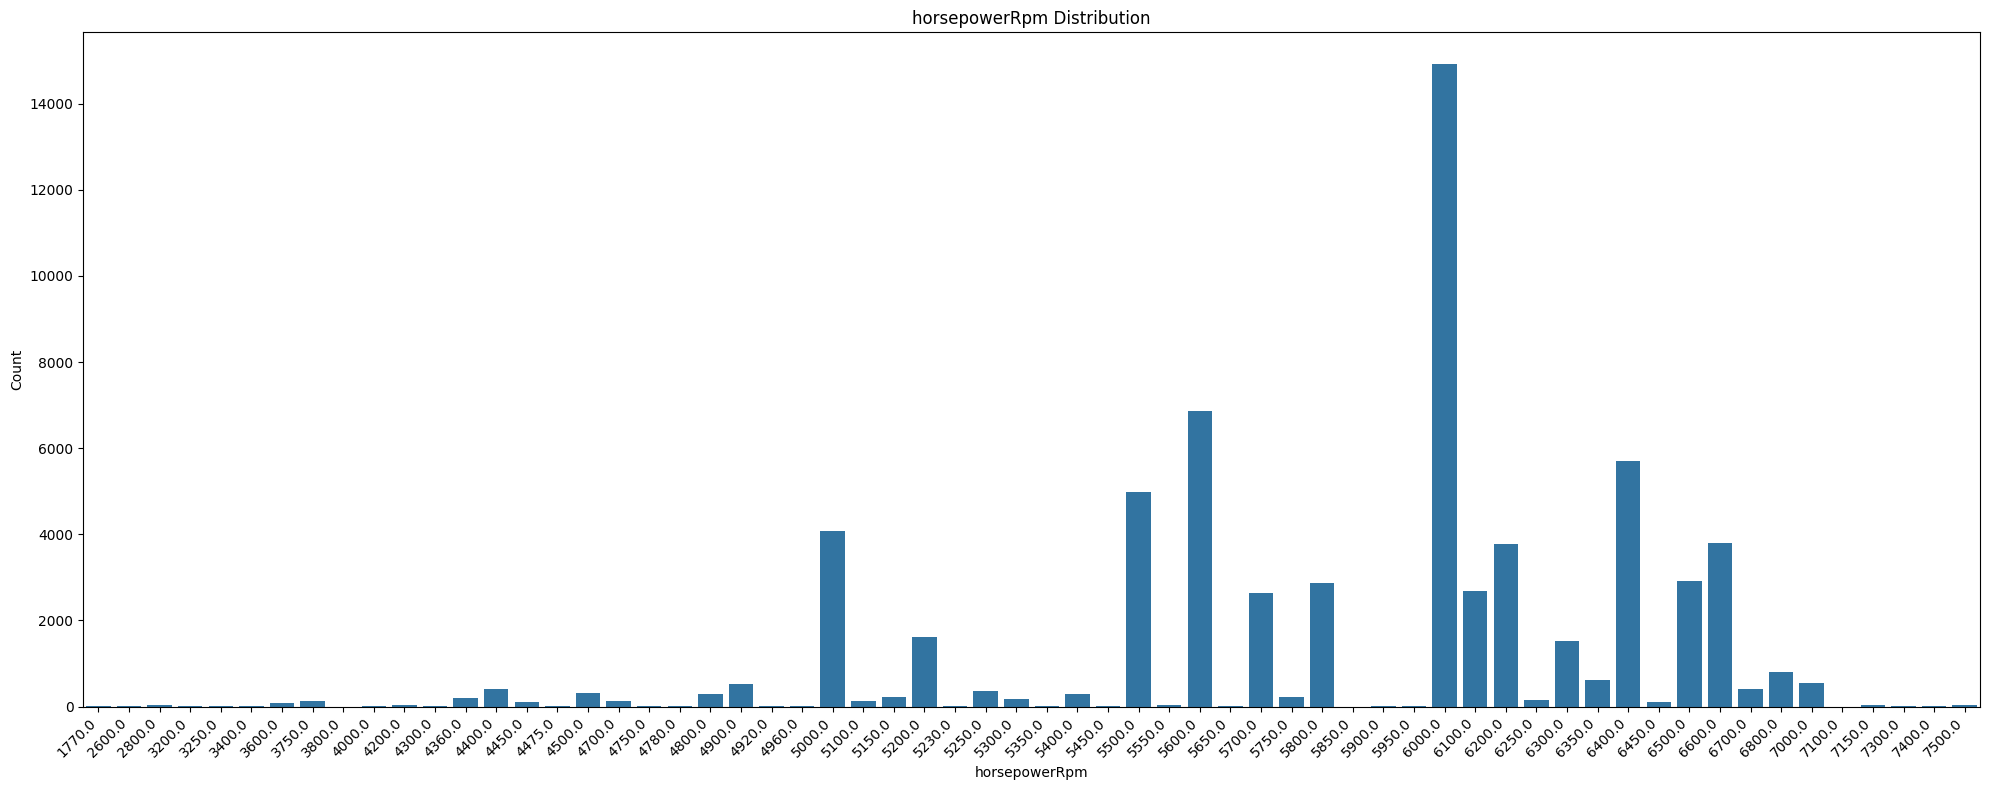

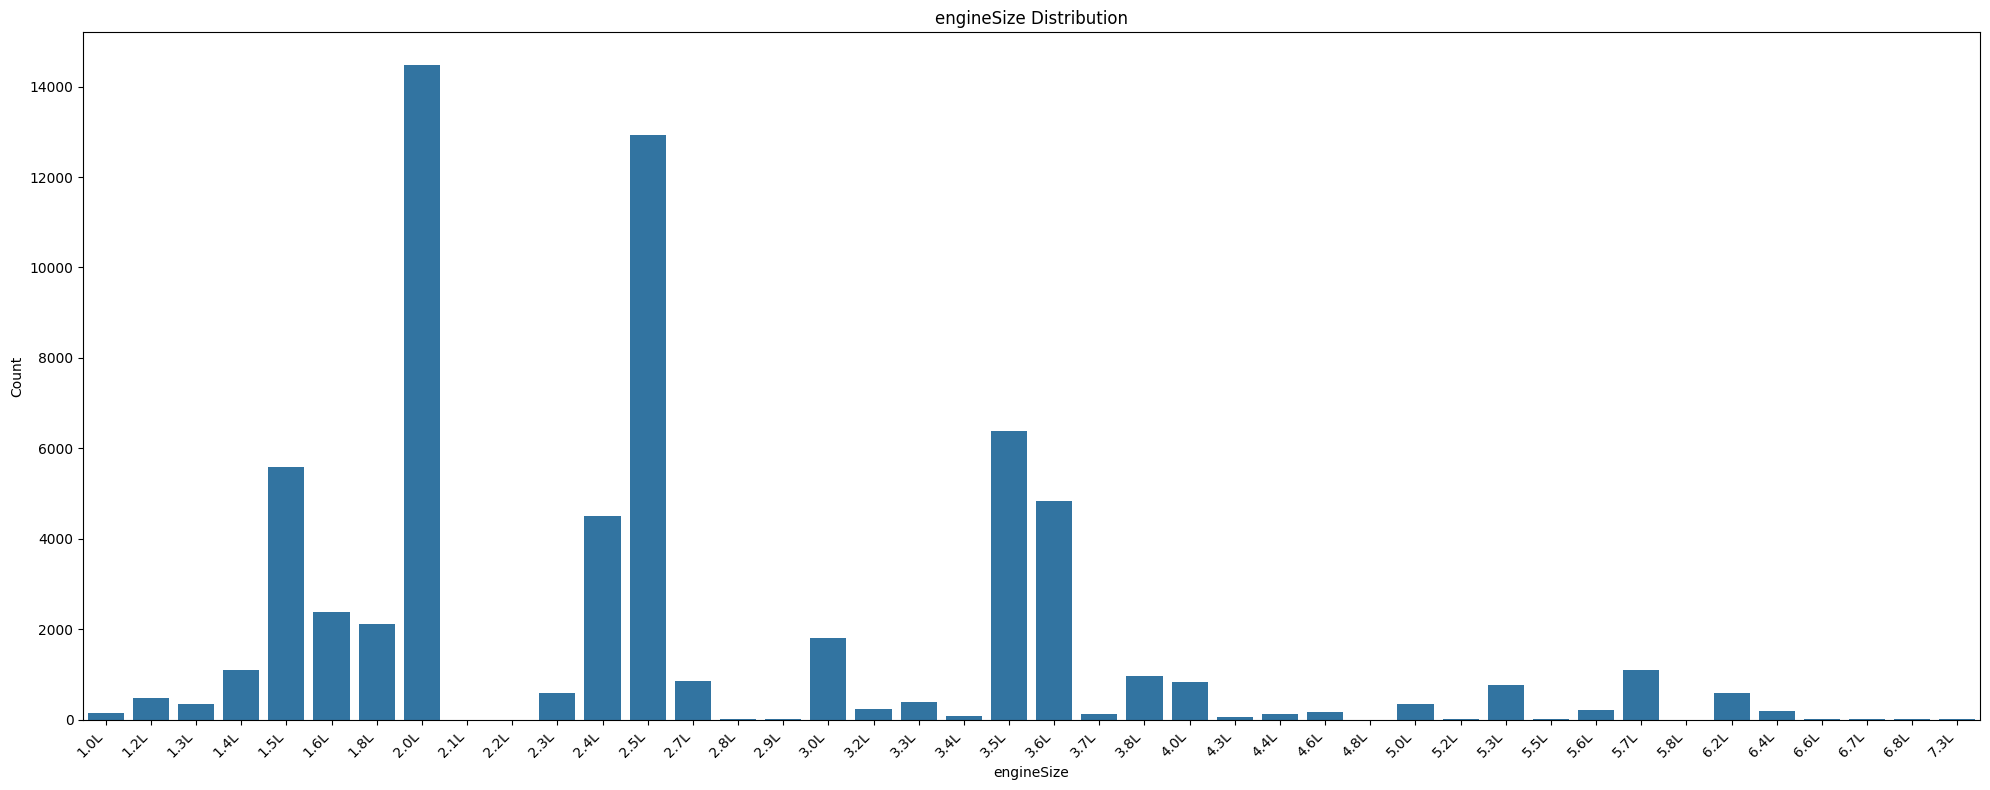

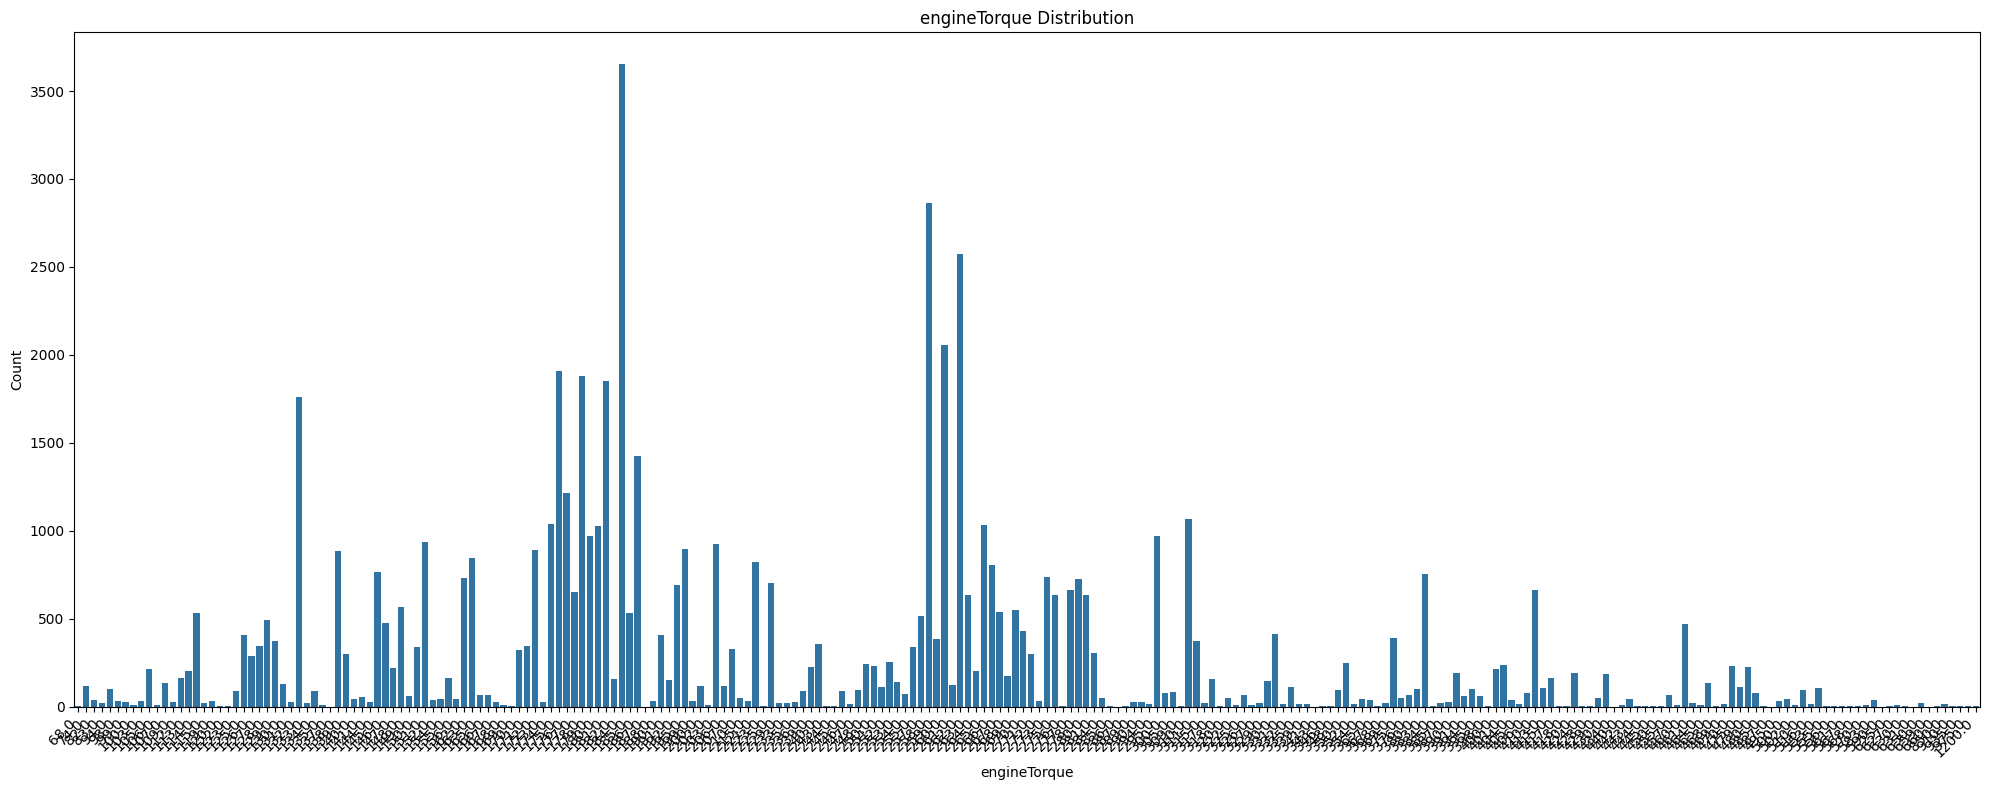

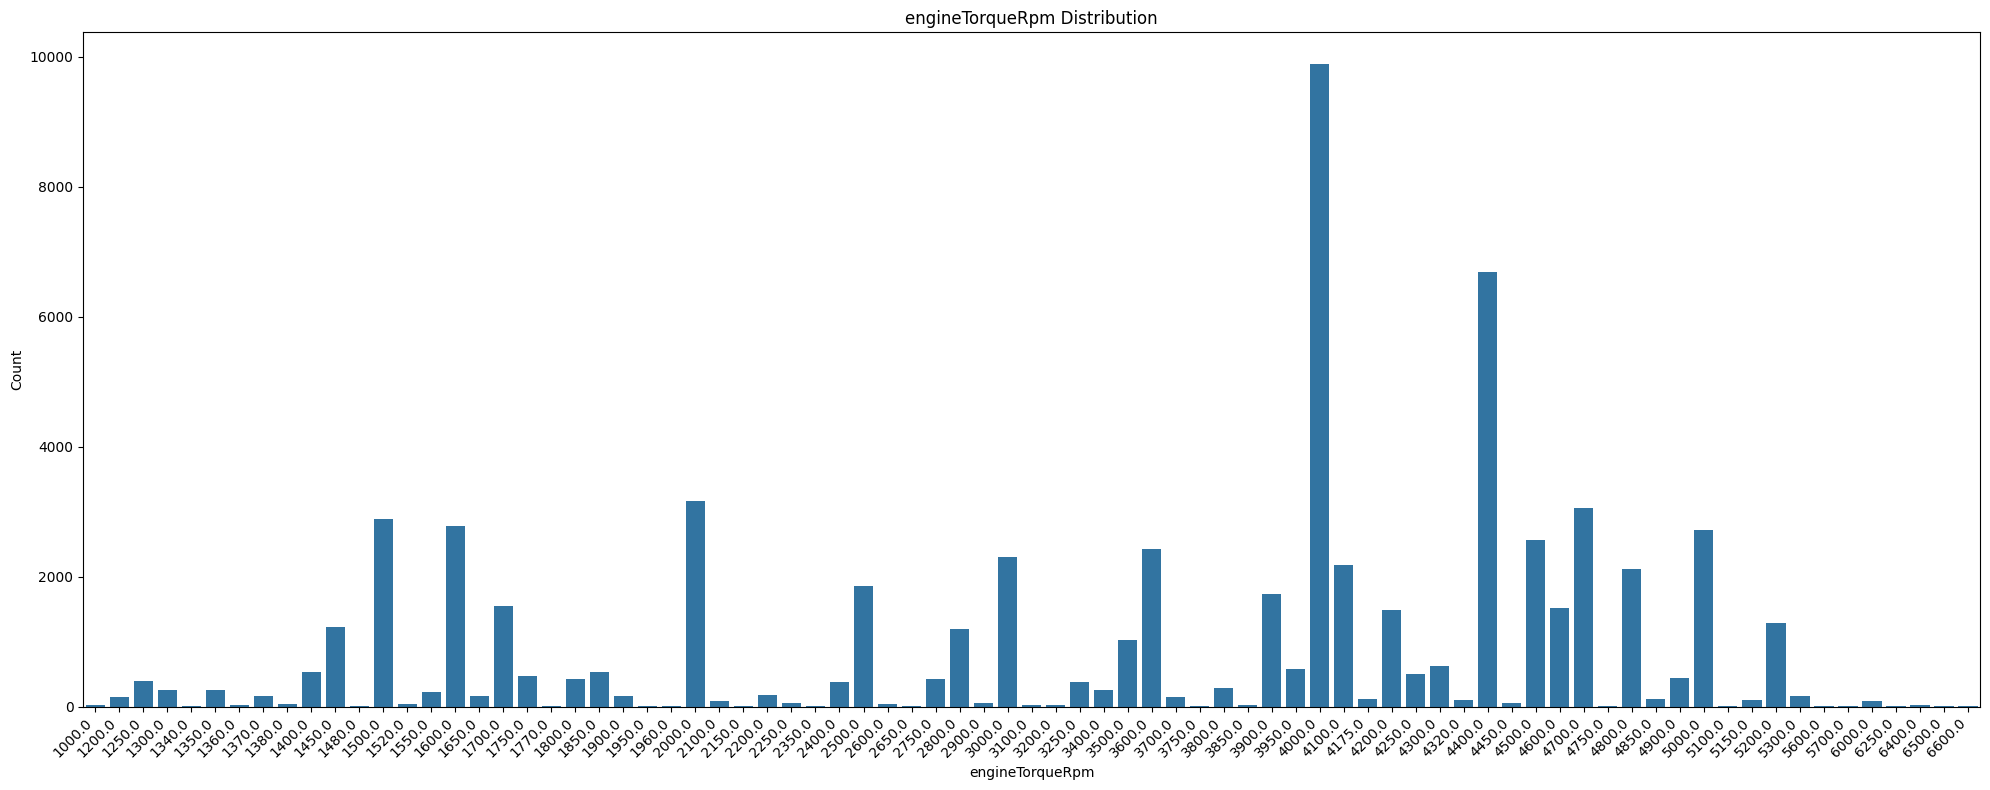

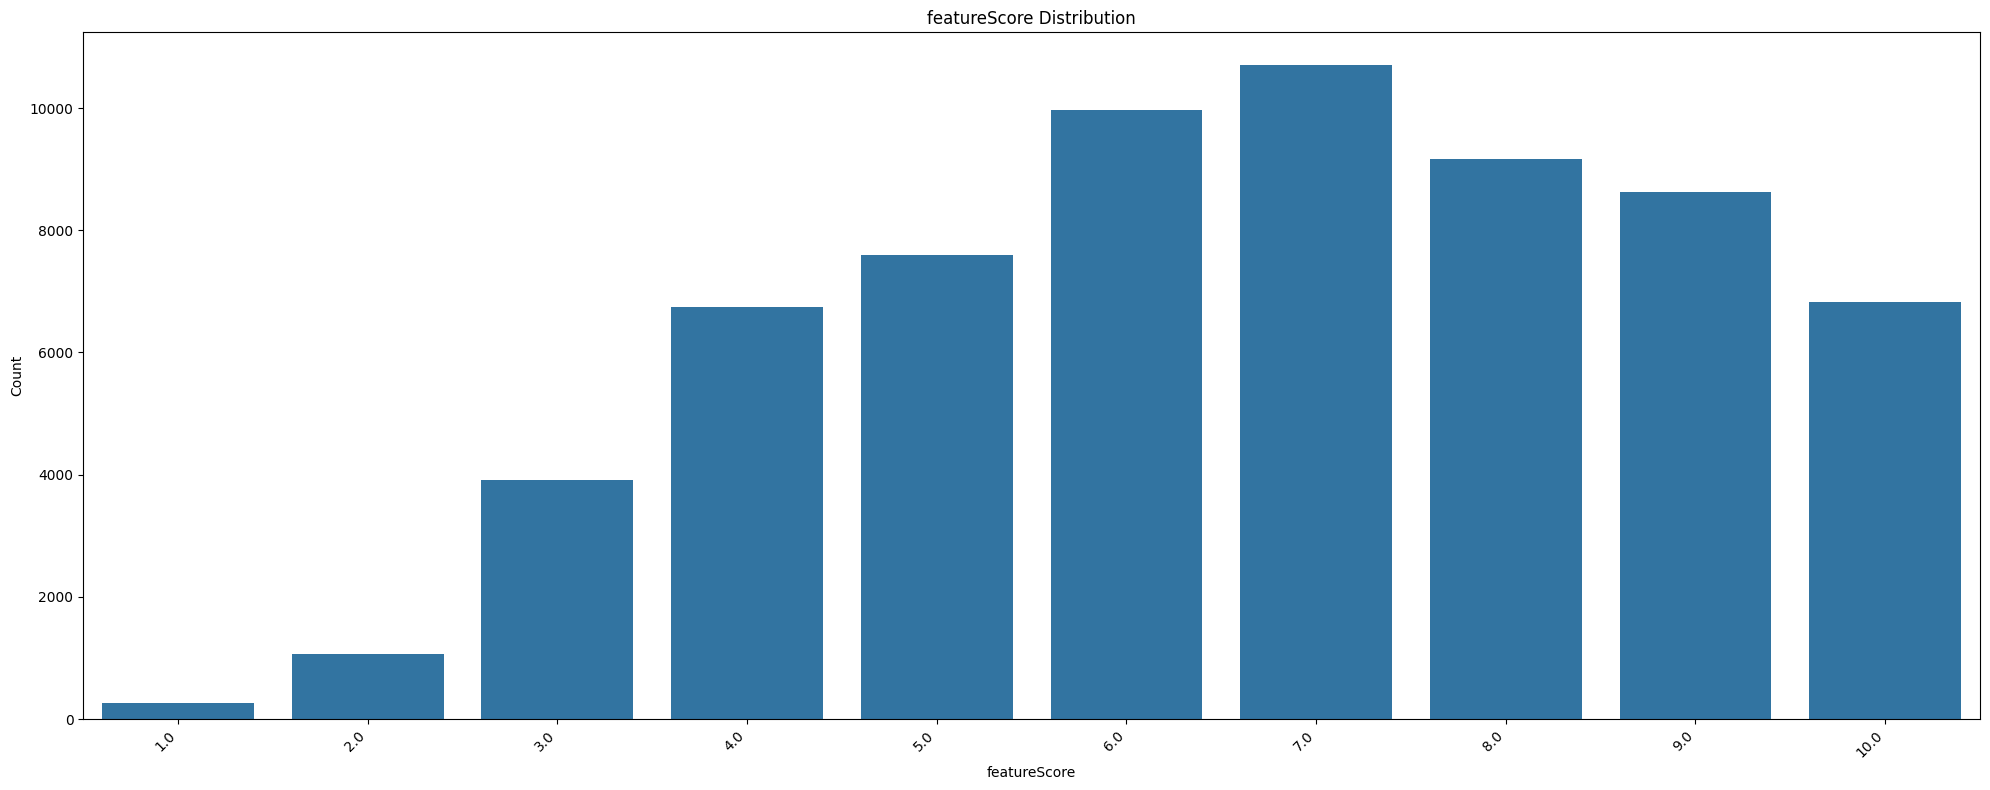

In [17]:
categorical_columns = [
    'body',
    'transferText', 'transferType', 'exteriorColor',
    'interiorColor', 'transmission', 'mpgCity',
    'mpgHighway', 'driveTrain', 'engineType',
    'horsepower', 'horsepowerRpm', 'engineSize',
    'engineTorque', 'engineTorqueRpm', 'featureScore'
]

for column in categorical_columns:
    plt.figure(figsize = (20, 8))
    sns.countplot(x = column, data=df_unique_cleaned, order = sorted(df_unique_cleaned[column].unique()))
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation = 45, ha = 'right')
    plt.tight_layout()
    plt.show()